# Load library

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load data

In [2]:
sales = pd.read_csv('https://github.com/aansubarkah/basangdata_pandas/raw/master/AW/Sales.SalesOrderHeader.csv', sep='\t', parse_dates=True)

In [3]:
sales.head(2).T

,0,1
Unnamed: 0,0,1
SalesOrderID,43659,43660
RevisionNumber,8,8
OrderDate,2011-05-31,2011-05-31
DueDate,2011-06-12,2011-06-12
ShipDate,2011-06-07,2011-06-07
Status,5,5
OnlineOrderFlag,False,False
SalesOrderNumber,SO43659,SO43660
PurchaseOrderNumber,PO522145787,PO18850127500


# Buat kolom OrderDate sebagai index

In [4]:
sales = sales.set_index('OrderDate')

# Uji kolom SalesOrderID

## Deskripsikan kolom

In [5]:
sales['SalesOrderID'].describe()

count    31465.000000
mean     59391.000000
std       9083.307446
min      43659.000000
25%      51525.000000
50%      59391.000000
75%      67257.000000
max      75123.000000
Name: SalesOrderID, dtype: float64

## Gambarkan hubungan antara waktu dan kolom SalesOrderID

Harapan kita adalah **SalesOrderID** berbanding lurus dengan waktu, makin hari nilai **SalesOrderID** makin besar

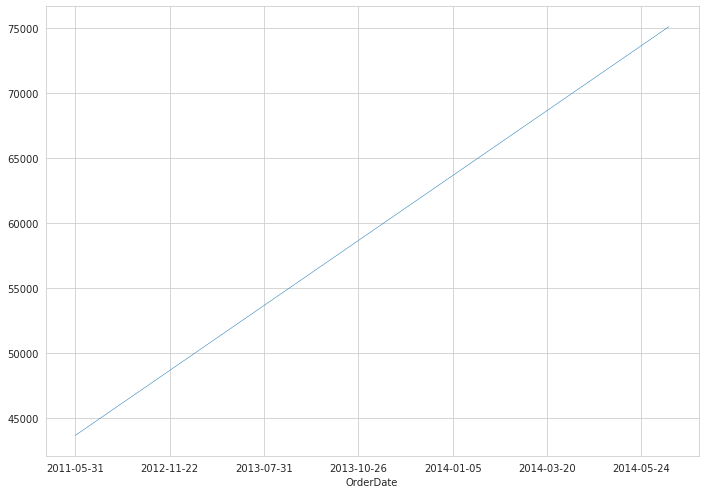

In [6]:
a4_dims = (11.7, 8.27)
plt.figure(figsize=a4_dims)

sns.set_style("whitegrid")
sales['SalesOrderID'].plot(linewidth=0.5);

Dari grafik terlihat hubungan antara **waktu** dan **SalesOrderID** berbanding **lurus**. Tidak ditemukan nomor lebih kecil pada hari setelahnya, artinya tidak ditemukan nomor yang disisipkan secara manual. Hal tersebut wajar mengingat "sepertinya" kolom tersebut diisi oleh sistem.

## Gambarkan hubungan antara waktu dan kolom SalesOrderNumber

Harapan kita sama dengan SalesOrderID, **SalesOrderNumber** pun berbanding lurus dengan waktu. Karena SalesOrderNumber terdiri dari huruf maka perlu diekstraksi angkanya, proses ekstraksi dapat dilihat di <a href="https://basangdata.com/pandas-ekstraksi-angka-dari-teks/">sini</a>.

In [7]:
sales['SONumber'] = sales['SalesOrderNumber'].str.extract('(\d+)').astype('int64')

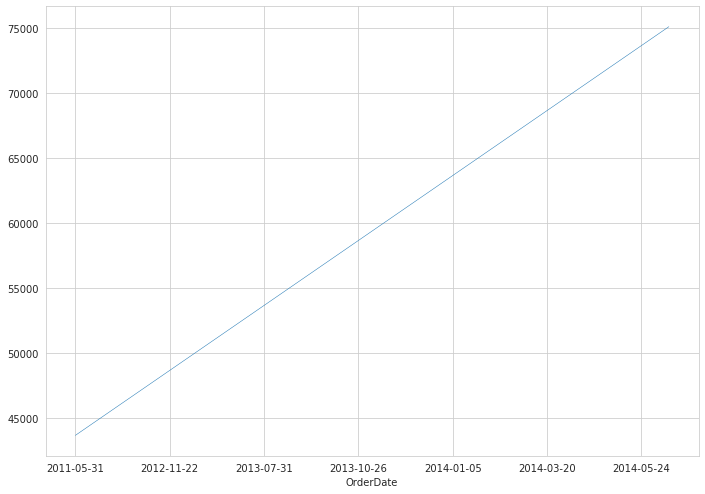

In [8]:
a4_dims = (11.7, 8.27)
plt.figure(figsize=a4_dims)

sns.set_style("whitegrid")
sales['SONumber'].plot(linewidth=0.5);

Simpulan yang didapatkan sama dengan **SalesOrderID**

## Gambarkan hubungan antara waktu dan kolom PurchaseOrderNumber

Harapan kita sama dengan SalesOrderID dan SalesOrderNumber, **PurchaseOrderNumber** pun berbanding lurus dengan waktu.

In [9]:
sales2 = sales[sales['PurchaseOrderNumber'].notnull()].copy()

In [10]:
sales2['PONumber'] = sales2['PurchaseOrderNumber'].str.extract('(\d+)').astype('int64')

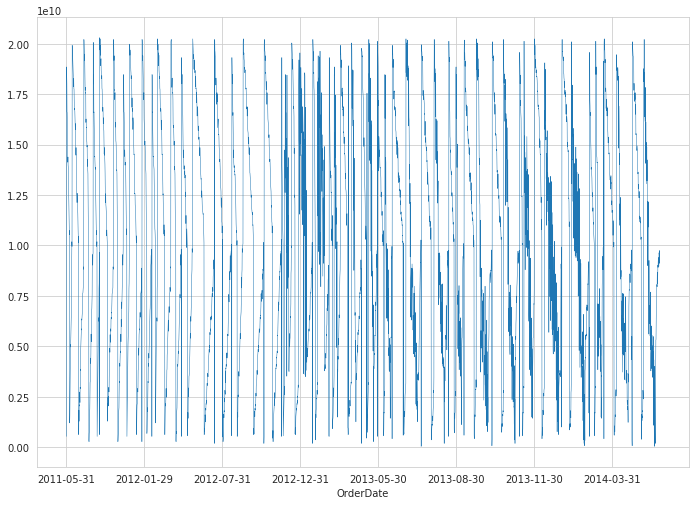

In [11]:
a4_dims = (11.7, 8.27)
plt.figure(figsize=a4_dims)

sns.set_style("whitegrid")
sales2['PONumber'].plot(linewidth=0.5);

Dari penjualan yang memiliki data **PurchaseOrderNumber** kita dapat lihat bahwa produk yang dibeli tidak langsung terjual namun dapat tersimpan "cukup lama" sampai terjual kembali.

In [12]:
sales2.head(20)[['PurchaseOrderNumber']]

,PurchaseOrderNumber
OrderDate,
2011-05-31,PO522145787
2011-05-31,PO18850127500
2011-05-31,PO18473189620
2011-05-31,PO18444174044
2011-05-31,PO18009186470
2011-05-31,PO16617121983
2011-05-31,PO16588191572
2011-05-31,PO16008173883
2011-05-31,PO15428132599
